In [3]:
import pandas as pd
import numpy as np 
import scipy as sp
import statsmodels.api as sm
import pylab as py

In [4]:
covid = pd.read_csv("Covid-19.csv")
covid = covid.drop(["Unnamed: 0"], axis=1)
covid.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temperature,Humidity
0,Hubei,Mainland China,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707,12.5,86
1,NaN,Italy,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000,12.9,64
2,NaN,Iran (Islamic Republic of),2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000,11.9,9
3,NaN,Republic of Korea,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000,4.9,41
4,NaN,France,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000,11.9,93


In [5]:
covid.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude,Temperature,Humidity
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,617.614583,22.197917,335.437500,30.381064,18.561578,12.727083,67.119792
std,4993.712023,223.488413,3451.634812,21.770743,81.774397,10.040635,22.099992
min,1.000000,0.000000,0.000000,-41.454500,-157.498300,-18.800000,6.000000
25%,4.000000,0.000000,0.000000,23.696250,-71.516375,6.650000,53.750000
50%,15.000000,0.000000,0.000000,35.842650,19.601150,12.000000,73.000000
75%,97.250000,1.000000,9.250000,43.505900,103.833550,20.900000,84.000000
max,67760.000000,3024.000000,47743.000000,64.963100,174.886000,33.100000,98.000000


In [6]:
covid.Temperature.mean()

12.727083333333335

In [11]:
def hyptest(data, value, alternate, alpha):
    z, p = sm.stats.ztest(data, value = value, alternative = alternate)
    result = 'null hypothesis rejected!' if p < alpha else 'null hypothesis not rejected'
    return z, p, result

In [12]:
hyptest(covid.Temperature, 12, "larger", 0.05)

(1.0033989581188794, 0.15783420330389508, 'null hypothesis not rejected')

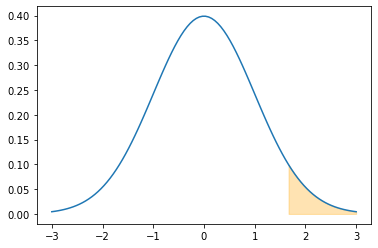

In [259]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mean = 0
variance = 1
sd = math.sqrt(variance)
points = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(points, stats.norm.pdf(points, mean, sd))
plt.fill_between(points,stats.norm.pdf(points, mean, sd), 0, where=(points>1.645), alpha=0.30, color="orange")
plt.savefig("right-tailed.png")
plt.show()

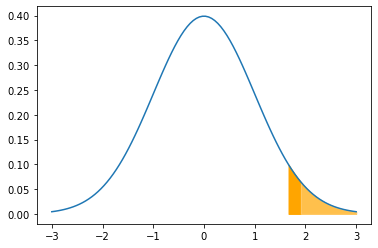

In [271]:
mean = 0
variance = 1
sd = math.sqrt(variance)
points = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(points, stats.norm.pdf(points, mean, sd))
plt.fill_between(points,stats.norm.pdf(points, mean, sd), 0, where=(points>1.645), color="orange")
plt.fill_between(points,stats.norm.pdf(points, mean, sd), 0, where=(points>1.88), alpha=0.30, color="white")
plt.savefig("right-tailed-w-p-value.png")
plt.show()

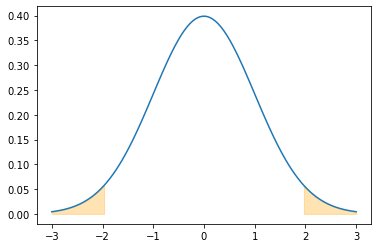

In [260]:
mean = 0
variance = 1
sd = math.sqrt(variance)
points = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(points, stats.norm.pdf(points, mean, sd))
plt.fill_between(points,stats.norm.pdf(points, mean, sd), 0, where=(points>1.960), alpha=0.30, color="orange")
plt.fill_between(points,stats.norm.pdf(points, mean, sd), 0, where=(points<-1.960), alpha=0.30, color="orange")
plt.savefig("two-tailed.png")
plt.show()